# Importing Libraries

In [142]:
#basic Libraries
import numpy as np
import pandas as pd
import warnings
import scipy

#Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE as RFE
from sklearn.metrics import r2_score


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# format types
import json

# NLP
# pip install langid or langdetect
import langid
from bs4 import BeautifulSoup 
import re
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import RegexpTokenizer
import nltk


In [150]:
# NLP extra
# for english
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/uniss/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:

#Libraries set up
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)

plt.style.use("seaborn-v0_8")  # replaced plt.style.use('seaborn') to fix deprecation error





# 1. Loading the dataset

In [5]:
# df = pd.read_csv("spotify_dataset.csv", encoding='ISO-8859-1')

#got an error (UnicodeDecodeError: "utf-8") when loading the dataset for the 1st time. 
#The UnicodeDecodeError: ‘utf-8’ codec can’t decode bytes in position 0-1: invalid continuation byte error 
#is a common error that occurs when trying to read a file with Pandas that contains non-UTF-8 encoded characters. 
#UTF-8 is a character encoding standard that’s widely used for text files, but it’s not the only encoding format out there. 
#If you try to read a file with a different encoding format, you may encounter this error.




In [6]:
# resaving and reloading with semicolon to avoid potential numerical confusion

CSV_SEMICOL_FILE_NAME = './data/spotify_dataset_scsv.csv'

# df.to_csv(CSV_SEMICOL_FILE_NAME, index=False, sep=';', encoding='utf-8')



In [11]:
DFs = {}
DFs.update({'0' : pd.read_csv(CSV_SEMICOL_FILE_NAME, sep=';', encoding='utf-8')})
df =DFs['0'].copy(deep=True)


In [24]:
# loading scraped JSON lyrics

LYRICS_JSON_FILE_NAME = './data/lyrics_single_and_multiple_artists_one search_224apr010745.json'

LYRs = {}

with open(LYRICS_JSON_FILE_NAME, 'r') as f:
    LYRs.update({'0': json.load(f)})

LYRs0 = LYRs['0']


## BEGIN 1A NLP Process Lyrics Json

In [18]:
DFs['0'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [22]:
len(LYRs['0'].keys())


945

In [28]:
LYRs0


{'240': {'Simone Mendes': "Calma, deixa eu respirar um pouco\nNós somos dois loucos\nOlha a gente nessa cama de novo\nO\u2005que\u2005'cê sente quando\u2005'cê mente\nNa minha cara pra ter\u2005uma hora de cama suada?\nE eu percebo a cada visita\n'Cê não gosta de mim, 'cê gosta é da conquista\n(Quero ver)\n\nAh, e agora como eu fico nessa casa\nCom sorriso ou choro no rosto?\n'Cê vem aqui, me acostuma errado\nCola meus pedaços pra quebrar de novo\nEu preciso aprender a falar não um pouco\nPra esse erro gostoso\nAh, e agora como eu fico nessa casa\nCom sorriso ou choro no rosto?\n'Cê vem aqui, me acostuma errado\nCola mеus pedaços pra quebrar de novo\nEu prеciso aprender a falar não um pouco\nPra esse erro gostoso\nYou might also like\nCalma, deixa eu respirar um pouco\nNós somos dois loucos\nOlha a gente nessa cama de novo\nO que 'cê sente quando 'cê mente\nNa minha cara pra ter uma hora de cama suada?\nE eu percebo a cada visita\n'Cê não gosta de mim, 'cê gosta é da conquista\n\nAh, e

In [63]:
#convert json data to a DataFrame
lyr_df = None
lyr_df = pd.DataFrame(data=None, columns=['i', 'artistnames', 'raw_lyrics' ])

for (i, artistname_lyr) in LYRs0.items():
    # print(i, list(artistname_lyr.keys())[0], list(artistname_lyr.values()) )
    lyr_df.loc[len(lyr_df)] = {'i': int(i), 'artistnames': list(artistname_lyr.keys())[0], 'raw_lyrics': list(artistname_lyr.values())[0]}
    # break

lyr_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 944
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   i            945 non-null    int64 
 1   artistnames  945 non-null    object
 2   raw_lyrics   945 non-null    object
dtypes: int64(1), object(2)
memory usage: 29.5+ KB


In [64]:
lyr_df.set_index(keys='i', drop=True, verify_integrity=True, inplace=True)


In [65]:
lyr_df


artistnames                                         raw_lyrics
i                                                                             
240           Simone Mendes  Calma, deixa eu respirar um pouco\nNós somos d...
184    Cigarettes After Sex  You leapt from crumbling bridges watching city...
869                  j-hope  Yeah, I'm thirsty\n필요해 비트 위 surfin'\n난 물 만난 물고...
315            Mae Stephens  If you keep wondering if somebody understands\...
530  TiÃ¯Â¿Â½Ã¯Â¿Â½sto, Ava    EquipoML_ERROR_NO_LYRICS_FOUND_WITH_THIS METHOD
..                      ...                                                ...
124              Peso Pluma  Cuando por las noches recordaba todo\nEl olor ...
940            Taylor Swift  If you would've blinked, then I would've\nLook...
342                Mahalini  Sampai saat ini tak terpikir olehku\nAku perna...
161            Daddy Yankee  (Oh, oh, oh, oh)\n(Oh, oh, oh, oh) Who's this?...
296                  Eminem  Look\nIf you had\nOne shot\nOr one opportunity...

[945 rows x 2 columns]

In [68]:
lyr_df.sort_index(inplace=True)
lyr_df


artistnames                                         raw_lyrics
i                                                                         
0      Latto, Jung Kook  Cargas con todo el peso del mundo en tus hombr...
1           Myke Towers  La-la-la-la-la-la (Full Harmony)\nLa-la-la-la-...
2        Olivia Rodrigo  Hate to give the satisfaction asking how you'r...
3          Taylor Swift  (Yeah, yeah, yeah, yeah)\n\nFever dream high i...
4             Bad Bunny  Baby, dime la verdad\nSi te olvidaste de mí\nY...
..                  ...                                                ...
947        Selena Gomez  Wanna hear a part to my story? I tried to hide...
948        Taylor Swift  No words appear before me in the aftermath\nSa...
949  Feid, Paulo Londra  Top Artistas Argentina 2022** = Sin transcribi...
950  Feid, Sech, Jhayco  Una noche que no puedo olvidar\nY aunque tenga...
951           Burna Boy  Ooh-ooh, ooh\nOoh-ooh, ooh\nMm-mm, mm\nMm-mhm,...

[945 rows x 2 columns]

### BEGIN 1c cleanup lyrics dataframe

In [69]:
lyr_tocln = lyr_df.copy(deep=True)


In [70]:
lyr_tocln['raw_lyrics'].describe()


count                                                 945
unique                                                816
top       EquipoML_ERROR_NO_LYRICS_FOUND_WITH_THIS METHOD
freq                                                  103
Name: raw_lyrics, dtype: object

In [74]:
df.index.to_series()


0        0
1        1
2        2
3        3
4        4
      ... 
947    947
948    948
949    949
950    950
951    951
Length: 952, dtype: int64

In [ ]:
df['i'] = df.index.to_series()


In [77]:
df.set_index(keys='i', drop=True, verify_integrity=True, inplace=True)


In [78]:
df


track_name      artist(s)_name  artist_count  \
i                                                                            
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
947                         My Mind & Me        Selena Gomez             1   
948            Bigger Than The Whole Sky        Taylor Swift             1   
949                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
950                        En La De Ella  Feid, Sech, Jhayco             3   
951                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
i                                                                        
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
947           2022              11             3                   953   
948           2022              10            21                  1180   
949           2022              11             3                   573   
950           2022              10            20                  1320   
951           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
i                                                      ...                   
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
947                  0   91473363                  61  ...  144   A  Major   
948                  0  121871870                   4  ...  166  F#  Major   
949                  0   73513683                   2  ...   92  C#  Major   
950                  0  133895612                  29  ...   97  C#  Major   
951                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
i                                                                           
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
947             60         24       39             57                   0   
948             42          7       24             83                   1   
949             80         81       67              4                   0   
950             82         67       77              8                   0   
951             61         32       67             15                   0   

     liveness_%  speechiness_%  
i 

In [82]:
dflyr = pd.merge(left=df, right=lyr_tocln, how='inner', on='i')
dflyr.head(3)


track_name    artist(s)_name  artist_count  \
i                                                                        
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   

   released_year  released_month  released_day  in_spotify_playlists  \
i                                                                      
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   

   in_spotify_charts    streams  in_apple_playlists  ...   mode  \
i                                                    ...          
0                147  141381703                  43  ...  Major   
1                 48  133716286                  48  ...  Major   
2                113  140003974                  94  ...  Major   

  danceability_%  valence_% energy_%  acousticness_% instrumentalness_%  \
i                                                                         
0             80         89       83              31                  0   
1             71         61       74               7                  0   
2             51         32       53              17                  0   

  liveness_%  speechiness_%       artistnames  \
i                                               
0          8              4  Latto, Jung Kook   
1         10              4       Myke Towers   
2         31              6    Olivia Rodrigo   

                                          raw_lyrics  
i                                                     
0  Cargas con todo el peso del mundo en tus hombr...  
1  La-la-la-la-la-la (Full Harmony)\nLa-la-la-la-...  
2  Hate to give the satisfaction asking how you'r...  

[3 rows x 26 columns]

In [92]:
dflyr['raw_lyrics'].duplicated().describe()
# NOTE: matches our scrapping API errors as recorded while retrieving the lyrics


count       945
unique        2
top       False
freq        816
Name: raw_lyrics, dtype: object

In [104]:
# drop rows with no lyrics / retrieval errors / duplicates
dflyrics_dropped_nonexistent = dflyr.loc[(dflyr['raw_lyrics'].duplicated()) != True]


In [105]:
dflyrics_dropped_nonexistent.describe()


artist_count  released_year  released_month  released_day  \
count    816.000000     816.000000      816.000000    816.000000   
mean       1.471814    2018.349265        6.039216     14.009804   
std        0.784318      10.155808        3.581949      9.178791   
min        1.000000    1942.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            816.000000         816.000000  8.160000e+02   
mean            5560.931373          12.533088  5.368003e+08   
std             8331.382125          20.076452  5.791105e+08   
min               31.000000           0.000000  2.762000e+03   
25%              898.500000           0.000000  1.522630e+08   
50%             2310.500000           4.000000  3.011469e+08   
75%             6063.500000          17.000000  7.175522e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          816.000000       816.000000        816.000000  816.000000   
mean            69.409314        53.920343          2.709559  122.448529   
std             87.796301        51.980126          6.064901   28.448680   
min              0.000000         0.000000          0.000000   65.000000   
25%             14.000000         8.000000          0.000000   98.000000   
50%             36.000000        40.000000          0.000000  120.000000   
75%             90.250000        88.250000          2.000000  142.000000   
max            672.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      816.000000  816.000000  816.000000      816.000000   
mean        66.656863   50.419118   63.905637       27.107843   
std         14.817082   23.491355   16.686196       26.273468   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   31.000000   53.000000        5.000000   
50%         68.000000   50.000000   65.000000       18.000000   
75%         78.000000   69.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          816.000000  816.000000     816.000000  
mean             1.800245   17.872549      10.063725  
std              9.038462   13.085033       9.736698  
min              0.000000    3.000000       2.000000  
25%              0.000000    9.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   23.000000      11.000000  
max             91.000000   92.000000      59.000000

In [106]:
# a new column for raw_lyrics str len to be used later for clean up
dflyrics_dropped_nonexistent['raw_lyrics_len'] = dflyrics_dropped_nonexistent['raw_lyrics'].apply(len)


In [117]:
dflyrics_dropped_nonexistent['raw_lyrics_len'].describe()


count       816.000000
mean       4463.017157
std       32089.951025
min          47.000000
25%        1385.500000
50%        1831.500000
75%        2454.500000
max      681527.000000
Name: raw_lyrics_len, dtype: float64

In [119]:
# drop rows with too lengthy string
dflyrics_dropped_IQR = dflyrics_dropped_nonexistent['raw_lyrics_len'].describe()['75%'] - dflyrics_dropped_nonexistent['raw_lyrics_len'].describe()['25%']
lower_outer_fence = dflyrics_dropped_nonexistent['raw_lyrics_len'].describe()['25%'] - 3 * dflyrics_dropped_IQR
upper_outer_fence = dflyrics_dropped_nonexistent['raw_lyrics_len'].describe()['75%'] + 3 * dflyrics_dropped_IQR

f"lower_outer_fence: {lower_outer_fence}  upper_outer_fence: {upper_outer_fence}"

lower_lyr_len = round(lower_outer_fence) if lower_outer_fence >= 0 else 0
upper_lyr_len_= round(upper_outer_fence)

f"lower_lyr_len: {lower_lyr_len}  upper_lyr_len_: {upper_lyr_len_}"




'lower_lyr_len: 0  upper_lyr_len_: 5662'

In [121]:
# drop rows with too lengthy strings

dflyrics_dropped_lengthy = dflyrics_dropped_nonexistent.loc[(dflyrics_dropped_nonexistent['raw_lyrics_len'] >= lower_lyr_len) & (dflyrics_dropped_nonexistent['raw_lyrics_len'] <= upper_lyr_len_)]


In [124]:
dflyrics_dropped_lengthy.head(3)


track_name    artist(s)_name  artist_count  \
i                                                                        
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   

   released_year  released_month  released_day  in_spotify_playlists  \
i                                                                      
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   

   in_spotify_charts    streams  in_apple_playlists  ...  danceability_%  \
i                                                    ...                   
0                147  141381703                  43  ...              80   
1                 48  133716286                  48  ...              71   
2                113  140003974                  94  ...              51   

  valence_%  energy_% acousticness_%  instrumentalness_% liveness_%  \
i                                                                     
0        89        83             31                   0          8   
1        61        74              7                   0         10   
2        32        53             17                   0         31   

  speechiness_%       artistnames  \
i                                   
0             4  Latto, Jung Kook   
1             4       Myke Towers   
2             6    Olivia Rodrigo   

                                          raw_lyrics  raw_lyrics_len  
i                                                                     
0  Cargas con todo el peso del mundo en tus hombr...            3103  
1  La-la-la-la-la-la (Full Harmony)\nLa-la-la-la-...            2391  
2  Hate to give the satisfaction asking how you'r...            2023  

[3 rows x 27 columns]

In [125]:
dflyrics_dropped_lengthy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 0 to 951
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            786 non-null    object
 1   artist(s)_name        786 non-null    object
 2   artist_count          786 non-null    int64 
 3   released_year         786 non-null    int64 
 4   released_month        786 non-null    int64 
 5   released_day          786 non-null    int64 
 6   in_spotify_playlists  786 non-null    int64 
 7   in_spotify_charts     786 non-null    int64 
 8   streams               786 non-null    int64 
 9   in_apple_playlists    786 non-null    int64 
 10  in_apple_charts       786 non-null    int64 
 11  in_deezer_playlists   786 non-null    object
 12  in_deezer_charts      786 non-null    int64 
 13  in_shazam_charts      741 non-null    object
 14  bpm                   786 non-null    int64 
 15  key                   704 non-null    object


In [126]:
# a new column for raw_lyrics number of CRLF  to be used later for clean up
dflyrics_dropped_crlf= dflyrics_dropped_lengthy.copy(deep=True)


In [127]:
CRLF = '\n'
dflyrics_dropped_crlf['raw_lyrics_crlf_count'] = dflyrics_dropped_crlf['raw_lyrics'].apply(lambda s: s.count(CRLF))


In [128]:
dflyrics_dropped_crlf.head(3)


track_name    artist(s)_name  artist_count  \
i                                                                        
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   

   released_year  released_month  released_day  in_spotify_playlists  \
i                                                                      
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   

   in_spotify_charts    streams  in_apple_playlists  ...  valence_% energy_%  \
i                                                    ...                       
0                147  141381703                  43  ...         89       83   
1                 48  133716286                  48  ...         61       74   
2                113  140003974                  94  ...         32       53   

   acousticness_% instrumentalness_%  liveness_% speechiness_%  \
i                                                                
0              31                  0           8             4   
1               7                  0          10             4   
2              17                  0          31             6   

        artistnames                                         raw_lyrics  \
i                                                                        
0  Latto, Jung Kook  Cargas con todo el peso del mundo en tus hombr...   
1       Myke Towers  La-la-la-la-la-la (Full Harmony)\nLa-la-la-la-...   
2    Olivia Rodrigo  Hate to give the satisfaction asking how you'r...   

   raw_lyrics_len  raw_lyrics_crlf_count  
i                                         
0            3103                     84  
1            2391                     75  
2            2023                     53  

[3 rows x 28 columns]

In [129]:
dflyrics_dropped_crlf['raw_lyrics_crlf_count'].describe()


count    786.000000
mean      58.222646
std       21.875561
min        0.000000
25%       44.000000
50%       55.000000
75%       69.000000
max      201.000000
Name: raw_lyrics_crlf_count, dtype: float64

In [132]:
# detect languages using langid

dflyrics_lyr_lang= dflyrics_dropped_crlf.copy(deep=True)


In [133]:
dflyrics_lyr_lang['raw_lyrics_langid'] = dflyrics_lyr_lang['raw_lyrics'].apply(lambda s: langid.classify(s)[0])


In [134]:
dflyrics_lyr_lang.head(5)


track_name    artist(s)_name  artist_count  \
i                                                                        
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
i                                                                      
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  energy_%  \
i                                                    ...             
0                147  141381703                  43  ...        83   
1                 48  133716286                  48  ...        74   
2                113  140003974                  94  ...        53   
3                100  800840817                 116  ...        72   
4                 50  303236322                  84  ...        80   

  acousticness_%  instrumentalness_% liveness_%  speechiness_%  \
i                                                                
0             31                   0          8              4   
1              7                   0         10              4   
2             17                   0         31              6   
3             11                   0         11             15   
4             14                  63         11              6   

        artistnames                                         raw_lyrics  \
i                                                                        
0  Latto, Jung Kook  Cargas con todo el peso del mundo en tus hombr...   
1       Myke Towers  La-la-la-la-la-la (Full Harmony)\nLa-la-la-la-...   
2    Olivia Rodrigo  Hate to give the satisfaction asking how you'r...   
3      Taylor Swift  (Yeah, yeah, yeah, yeah)\n\nFever dream high i...   
4         Bad Bunny  Baby, dime la verdad\nSi te olvidaste de mí\nY...   

   raw_lyrics_len  raw_lyrics_crlf_count  raw_lyrics_langid  
i                                                            
0            3103                     84                 es  
1            2391                     75                 es  
2            2023                     53                 en  
3            2279                     66                 en  
4            1830                     52                 es  

[5 rows x 29 columns]

In [137]:
dflyrics_lyr_lang['raw_lyrics_langid'].describe()


count     786
unique     21
top        en
freq      522
Name: raw_lyrics_langid, dtype: object

In [138]:
dflyrics_lyr_lang['raw_lyrics_langid'].unique()


array(['es', 'en', 'la', 'ko', 'tr', 'id', 'pa', 'uk', 'pt', 'ru', 'ms',
       'ur', 'zh', 'hi', 'ar', 'an', 'ja', 'it', 'fr', 'cy', 'de'],
      dtype=object)

In [144]:
# choose english only, for now, 
# drop other languages
# drop rows with too lengthy strings

dflyrics_eng = dflyrics_lyr_lang.loc[(dflyrics_lyr_lang['raw_lyrics_langid'] == 'en')]



In [145]:
dflyrics_eng.info()


<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 2 to 951
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   track_name             522 non-null    object
 1   artist(s)_name         522 non-null    object
 2   artist_count           522 non-null    int64 
 3   released_year          522 non-null    int64 
 4   released_month         522 non-null    int64 
 5   released_day           522 non-null    int64 
 6   in_spotify_playlists   522 non-null    int64 
 7   in_spotify_charts      522 non-null    int64 
 8   streams                522 non-null    int64 
 9   in_apple_playlists     522 non-null    int64 
 10  in_apple_charts        522 non-null    int64 
 11  in_deezer_playlists    522 non-null    object
 12  in_deezer_charts       522 non-null    int64 
 13  in_shazam_charts       479 non-null    object
 14  bpm                    522 non-null    int64 
 15  key                    471 n

In [ ]:
# raw lyrics cleanup


In [148]:
# Cleaning artists name

def lyrics_to_words(raw_lyr):
    '''
    Function to convert an artist name to a string of words
    The input is a single string , and 
    the output is a single string (a cleaned artist name)
    '''
 
    lyr_text = BeautifulSoup(raw_lyr).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", lyr_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))


In [151]:
dflyrics_eng['lyrics'] = dflyrics_eng['raw_lyrics'].apply(lyrics_to_words)


In [152]:
dflyrics_eng['lyrics'].head(3)


i
2    hate give satisfaction asking castle built peo...
3    yeah yeah yeah yeah fever dream high quiet nig...
5    mandem inconsiderate five star hotel smokin ci...
Name: lyrics, dtype: object

In [153]:
dflyrics_eng['lyrics'].tail(3)


i
947    wanna hear part story tried hide glory sweep t...
948    words appear aftermath salt streams eyes ears ...
951    ooh ooh ooh ooh ooh ooh mm mm mm mm mhm mm ano...
Name: lyrics, dtype: object

### END 1c cleanup lyrics dataframe

## END 1A NLP Process Lyrics Json

# 2. Initial exploration

In [13]:
df.head()


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

### 2a BEGIN investigate 'in_deezer_playlists' and 'in_shazam_charts'

note: shows as str/obj while these are supposed to be int

In [15]:
# check in_deezer_playlists and convert to int64
df['in_deezer_playlists'].isnull().sum()

f"check in_deezer_playlists and convert to int64: {df['in_deezer_playlists'].isnull().sum()}"


'check in_deezer_playlists and convert to int64: 0'

In [12]:
# looking if there are values that can't parse to numbers
in_deezer_playlists_to_numerics_coreced = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# count how many NaNs because of 'coerce'
f"count how many NaNs because of 'coerce': {in_deezer_playlists_to_numerics_coreced.isnull().sum()}"    # Pandas treats NaNs as Nulls



"count how many NaNs because of 'coerce': 79"

In [16]:
# correct, replace or impute in Deezer playlists NaNs/Nulls to their mean, then convert to rounded int64
in_deezer_playlists_mean = in_deezer_playlists_to_numerics_coreced.mean()
df.loc[in_deezer_playlists_to_numerics_coreced.isnull() , 'in_deezer_playlists']


48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
760    2,453
761    2,430
870    6,720
892    1,315
909    7,827
Name: in_deezer_playlists, Length: 79, dtype: object

In [17]:
# Note: the previous seem to be comma- thousands separated numbers, so we assume these are correct as they are within reasonnable range and that they represent a non US encoding
# so we convert them to their int equivalent
in_deezer_fixme = df.loc[:, 'in_deezer_playlists']
CONST_in_deezer_playlists_thousands_sep = ','
CONST_in_deezer_playlists_thousands_substitute = ''
in_deezer_fixed = in_deezer_fixme.map(lambda s: s.replace(CONST_in_deezer_playlists_thousands_sep, CONST_in_deezer_playlists_thousands_substitute))
in_deezer_fixed 


0       45
1       58
2       91
3      125
4       87
      ... 
947     37
948      8
949      7
950     17
951     32
Name: in_deezer_playlists, Length: 952, dtype: object

In [19]:
# try again to convert all in_deezer_playlists to numeric
in_deezer_playlists_to_numerics_coreced = pd.to_numeric(in_deezer_fixed, errors='coerce')

# check again count how many NaNs because of 'coerce'. 
# 0 -> Success
in_deezer_playlists_to_numerics_coreced.isnull().sum()  # Pandas treats NaNs as Nulls


0

In [56]:
# # check in_shazam_charts and convert to int64
# df['in_shazam_charts'].isnull().sum()

# f"check in_shazam_charts and convert to int64: {df['in_shazam_charts'].isnull().sum()}"


'check in_shazam_charts and convert to int64: 50'

In [57]:
# # looking if there are values that can't parse to numbers
# in_shazam_charts_to_numerics_coreced = pd.to_numeric(df['in_shazam_charts'], errors='coerce' )

# # count how many NaNs because of 'coerce'
# f"count how many NaNs because of 'coerce': {in_shazam_charts_to_numerics_coreced.isnull().sum()}"    # Pandas treats NaNs as Nulls


"count how many NaNs because of 'coerce': 57"

In [67]:
# # correct, replace or impute in Deezer playlists NaNs/Nulls to their mean, then convert to rounded int64
# in_shazam_charts_mean = in_shazam_charts_to_numerics_coreced.mean()
# in_shazam_charts_mean


51.233519553072625

In [65]:
# df.loc[in_shazam_charts_to_numerics_coreced.isnull() , 'in_shazam_charts']


12     1,021
13     1,281
14       NaN
17     1,173
24     1,093
44     1,133
54       NaN
55       NaN
71       NaN
73       NaN
86       NaN
88     1,451
89     1,170
127      NaN
158      NaN
159      NaN
180      NaN
243      NaN
274      NaN
320      NaN
392      NaN
395      NaN
403      NaN
410      NaN
429      NaN
434      NaN
440      NaN
441      NaN
442      NaN
443      NaN
444      NaN
446      NaN
449      NaN
500      NaN
501      NaN
504      NaN
506      NaN
507      NaN
513      NaN
518      NaN
519      NaN
520      NaN
529      NaN
531      NaN
532      NaN
533      NaN
534      NaN
535      NaN
549      NaN
554      NaN
560      NaN
566      NaN
583      NaN
619      NaN
624      NaN
726      NaN
926      NaN
Name: in_shazam_charts, dtype: object

In [70]:
# # Note: the previous seem to be comma- thousands separated numbers, so we assume these are correct as they are within reasonnable range and that they represent a non US encoding
# # so we convert them to their int equivalent
# in_shazam_charts_fixme = df.loc[in_shazam_charts_to_numerics_coreced.isnull(), 'in_shazam_charts']
# in_deezer_fixme
# # CONST_in_shazam_charts_thousands_sep = ','
# # CONST_in_shazam_charts_thousands_substitute = ''
# # in_shazam_charts_fixed = in_shazam_charts_fixme.map(lambda o: str(in_shazam_charts_mean) if pd.isna(o) else o)
# # in_shazam_charts_fixed

# # in_shazam_charts_fixed = in_shazam_charts_fixme.map(lambda s: s.replace(CONST_in_shazam_charts_thousands_sep, CONST_in_shazam_charts_thousands_substitute))
# # # in_shazam_charts_fixed 


0       45
1       58
2       91
3      125
4       87
      ... 
947     37
948      8
949      7
950     17
951     32
Name: in_deezer_playlists, Length: 952, dtype: object

In [ ]:
# # try again to convert all in_deezer_playlists to numeric
# in_shazam_charts_to_numerics_coreced = pd.to_numeric(in_shazam_charts_fixed, errors='coerce')

# # check again count how many NaNs because of 'coerce'. 
# # 0 -> Success
# in_shazam_charts_to_numerics_coreced.isnull().sum()  # Pandas treats NaNs as Nulls


In [71]:
df_2a = df.copy(deep=True)
df_2a[ 'in_deezer_playlists'] = in_deezer_playlists_to_numerics_coreced


In [72]:
df_2a.dtypes


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
released_season         object
dtype: object

In [74]:
df_2a.drop(columns='in_shazam_charts', inplace=True)


#### 2a END investigate 'in_deezer_playlists'



#### 2b BEGIN isolate categorical variables



In [23]:
# enumerate sets of values in each column to visually check for possible inconsistencies
all_cols_list_2b = list(df.columns)
all_cols_list_2b


['track_name',
 'artist(s)_name',
 'artist_count',
 'released_year',
 'released_month',
 'released_day',
 'in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts',
 'bpm',
 'key',
 'mode',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

In [45]:
# categorical vars (bpm here considered categorical)
# note: we dropped previously ["track_name", "artist(s)_name", "released_year", "released_month", "released_day"]
# with  df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day"], axis=1, inplace=True)
cols_categoricals_2b = ['artist_count', 
'bpm',
'key',
'mode',
]

cols_categoricals_values = [df_2a[col].unique() for col in cols_categoricals_2b ]

cols_categoricals_2b


['artist_count', 'bpm', 'key', 'mode']

In [85]:
# continuous vars frequencies
cols_continuous_2b = ['in_spotify_playlists',
 'in_spotify_charts',
 'streams',
 'in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
#  'in_shazam_charts'
 ]

df_2a[cols_continuous_2b].describe()


in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000  1.416362e+08   
50%             2216.500000           3.000000  2.905309e+08   
75%             5573.750000          16.000000  6.738690e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          952.000000       952.000000           952.000000   
mean            67.866597        51.963235           385.535714   
std             86.470591        50.628850          1131.078760   
min              0.000000         0.000000             0.000000   
25%             13.000000         7.000000            13.000000   
50%             34.000000        38.500000            44.000000   
75%             88.000000        87.000000           164.250000   
max            672.000000       275.000000         12367.000000   

       in_deezer_charts  
count        952.000000  
mean           2.669118  
std            6.038152  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            2.000000  
max           58.000000

In [86]:
cols_pcnt_2b = [
'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

df_2a[cols_pcnt_2b].describe()


danceability_%   valence_%    energy_%  acousticness_%  \
count      952.000000  952.000000  952.000000      952.000000   
mean        66.984244   51.406513   64.274160       27.078782   
std         14.631282   23.480526   16.558517       26.001599   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       18.000000   
75%         78.000000   70.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

#### 2b END isolate categorical variables


### 2c BEGIN create seasons categorical feature from date variables

#### investigate released_year, month and day, artist count, unique artists, artist count groups

In [90]:
df_2a.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'released_season'],
      dtype='object')

In [44]:
####  unique artists solo or (much less likely collab.)
df_2a['artist_count'].value_counts()
# df['artist(s)_name'].unique().size



artist_count
1    586
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: count, dtype: int64

In [91]:
df_2a['released_year'].value_counts()


released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1970      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

In [92]:
df_2a['released_month'].value_counts()


released_month
1     133
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64

In [93]:
df_2a['released_day'].value_counts()


released_day
1     94
21    44
13    43
24    40
2     39
20    39
4     39
7     39
6     39
10    37
9     36
22    33
3     32
25    28
17    28
14    26
8     25
19    25
5     25
23    23
29    23
30    22
11    22
28    21
27    21
15    21
16    20
31    19
18    19
12    17
26    13
Name: count, dtype: int64

In [94]:
df_2a['bpm'].value_counts()


bpm
120    39
140    31
130    31
92     25
110    23
       ..
182     1
204     1
192     1
163     1
165     1
Name: count, Length: 124, dtype: int64

In [95]:
df_2a['key'].value_counts()


key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [96]:
df_2a['mode'].value_counts()


mode
Major    549
Minor    403
Name: count, dtype: int64

In [75]:
# 
df_2a['artist(s)_name'].value_counts()



artist(s)_name
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 644, dtype: int64

In [103]:
# agregate streams by artist
df_2a.groupby(by='artist(s)_name')[cols_continuous_2b].agg(['min', 'max', 'sum']).sort_values(by=('streams', 'sum'), ascending=False)



in_spotify_playlists  \
                                                                    min   
artist(s)_name                                                            
The Weeknd                                                          715   
Taylor Swift                                                         86   
Ed Sheeran                                                          715   
Harry Styles                                                       1517   
Bad Bunny                                                           829   
...                                                                 ...   
Offset, JID                                                         214   
Mc Pedrinho, DJ 900                                                 293   
Sog, Ryan Castro, Peso Pluma                                        437   
Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vi...                  138   
Carin Leon, Grupo Frontera                                          763   

                                                                   \
                                                      max     sum   
artist(s)_name                                                      
The Weeknd                                          43899  144053   
Taylor Swift                                        21335  132974   
Ed Sheeran                                          33032  128758   
Harry Styles                                        23575  110026   
Bad Bunny                                            9644   51317   
...                                                   ...     ...   
Offset, JID                                           214     214   
Mc Pedrinho, DJ 900                                   293     293   
Sog, Ryan Castro, Peso Pluma                          437     437   
Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vi...    138     138   
Carin Leon, Grupo Frontera                            763     763   

                                                   in_spotify_charts       \
                                                                 min  max   
artist(s)_name                                                              
The Weeknd                                                         0   69   
Taylor Swift                                                       0  100   
Ed Sheeran                                                         0   30   
Harry Styles                                                       0  130   
Bad Bunny                                                          0   50   
...                                                              ...  ...   
Offset, JID                                                        0    0   
Mc Pedrinho, DJ 900                                                8    8   
Sog, Ryan Castro, Peso Pluma                                      31   31   
Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vi...                 4    4   
Carin Leon, Grupo Frontera                                        26   26   

                                                           streams  \
                                                    sum        min   
artist(s)_name                                                       
The Weeknd                                          180   31959571   
Taylor Swift                                        542   30343206   
Ed Sheeran                                           94   39893489   
Harry Styles                                        185  137070925   
Bad Bunny                                           268  212351890   
...                                                 ...        ...   
Offset, JID                                           0   24975653   
Mc Pedrinho, DJ 900                                   8   11956641   
Sog, Ryan Castro, Peso Pluma                         31   11599388   
Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vi...    4    1365184   
Carin Leon, Grupo Frontera                  

In [105]:
df_2b_continuous = df_2a.groupby(by='artist(s)_name')[cols_continuous_2b].agg(sum)
df_2b_continuous


in_spotify_playlists  \
artist(s)_name                                                        
(G)I-DLE                                                        881   
21 Savage, Gunna                                                807   
24kgoldn, Iann Dior                                           12854   
50 Cent                                                       30427   
A$AP Rocky, Metro Boomin, Roisee                                727   
...                                                             ...   
j-hope                                                          565   
j-hope, J. Cole                                                 615   
sped up 8282                                                    472   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert                  1638   
teto                                                            315   

                                               in_spotify_charts     streams  \
artist(s)_name                                                                 
(G)I-DLE                                                      39   266983330   
21 Savage, Gunna                                               0    60680939   
24kgoldn, Iann Dior                                            0  1699402402   
50 Cent                                                        7  1202722675   
A$AP Rocky, Metro Boomin, Roisee                              16    94186466   
...                                                          ...         ...   
j-hope                                                         0   155795783   
j-hope, J. Cole                                                2   116599790   
sped up 8282                                                   2   103762518   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert                 10   207033255   
teto                                                           2   139193812   

                                               in_apple_playlists  \
artist(s)_name                                                      
(G)I-DLE                                                       24   
21 Savage, Gunna                                                3   
24kgoldn, Iann Dior                                           237   
50 Cent                                                       235   
A$AP Rocky, Metro Boomin, Roisee                               17   
...                                                           ...   
j-hope                                                          6   
j-hope, J. Cole                                                22   
sped up 8282                                                    0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert                   0   
teto                                                           27   

                                               in_apple_charts  \
artist(s)_name                                                   
(G)I-DLE                                                   242   
21 Savage, Gunna                                             0   
24kgoldn, Iann Dior                                         27   
50 Cent                                                    106   
A$AP Rocky, Metro Boomin, Roisee                            60   
...                                                        ...   
j-hope                                                      52   
j-hope, J. Cole                                             82   
sped up 8282                                                 0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert                0   
teto                                                         2   

                                               in_deezer_playlists  \
artist(s)_name                                                       
(G)I-DLE                                                        16   
21 Savage, Gunna                                                 5   
24kgoldn, Iann Dior                          

In [106]:
df_2b_pcnt = df_2a.groupby(by='artist(s)_name')[cols_pcnt_2b].agg(np.mean)
df_2b_pcnt


danceability_%  valence_%  \
artist(s)_name                                                             
(G)I-DLE                                                 77.5       67.0   
21 Savage, Gunna                                         68.0       29.0   
24kgoldn, Iann Dior                                      70.0       76.0   
50 Cent                                                  90.0       79.0   
A$AP Rocky, Metro Boomin, Roisee                         60.0       13.0   
...                                                       ...        ...   
j-hope                                                   78.0       31.0   
j-hope, J. Cole                                          68.0       81.0   
sped up 8282                                             74.0       75.0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert            69.0       36.0   
teto                                                     87.0       28.0   

                                               energy_%  acousticness_%  \
artist(s)_name                                                            
(G)I-DLE                                           87.0             3.5   
21 Savage, Gunna                                   73.0             0.0   
24kgoldn, Iann Dior                                72.0            22.0   
50 Cent                                            71.0            26.0   
A$AP Rocky, Metro Boomin, Roisee                   53.0             4.0   
...                                                 ...             ...   
j-hope                                             72.0             1.0   
j-hope, J. Cole                                    82.0            53.0   
sped up 8282                                       73.0            42.0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert      90.0             1.0   
teto                                               50.0            12.0   

                                               instrumentalness_%  liveness_%  \
artist(s)_name                                                                  
(G)I-DLE                                                      0.0        37.5   
21 Savage, Gunna                                              0.0         7.0   
24kgoldn, Iann Dior                                           0.0        27.0   
50 Cent                                                       0.0         7.0   
A$AP Rocky, Metro Boomin, Roisee                              0.0        21.0   
...                                                           ...         ...   
j-hope                                                        0.0        11.0   
j-hope, J. Cole                                               0.0         9.0   
sped up 8282                                                  0.0         9.0   
sped up nightcore, ARIZONATEARS, Lil Uzi Vert                10.0        15.0   
teto                                                          0.0        10.0   

                                               speechiness_%  
artist(s)_name                                                
(G)I-DLE                                                11.5  
21 Savage, Gunna                                         7.0  
24kgoldn, Iann Dior                                      4.0  
50 Cent                                                 37.0  
A$AP Rocky, Metro Boomin, Roisee                         4.0  
...                                                      ...  
j-hope                                                   4.0  
j-hope, J. Cole                                         13.0  
sped up 8282                                             4.0  
sped up nightcore, ARIZONATEARS, Lil Uzi Vert            4.0  
teto                                                    10.0  

[644 rows x 7 columns]

In [29]:
conditions = [    
    (df["released_month"] > 11) | (df["released_month"] <= 3),
    (df["released_month"] == 4) | (df["released_month"] == 5),
    (df["released_month"] >= 6) | (df["released_month"] <= 9),
    (df["released_month"] == 10) | (df["released_month"] == 11)
]

# create a list of the values we want to assign for each condition
values = ['Winter', 'Spring', 'Summer', 'Fall']
    
# create a new column and use np.select to assign values to it using our lists as arguments
df['released_season'] = np.select(conditions, values)


In [30]:
df.head(5)


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  43  ...    B  Major   
1                 48  133716286                  48  ...   C#  Major   
2                113  140003974                  94  ...    F  Major   
3                100  800840817                 116  ...    A  Major   
4                 50  303236322                  84  ...    A  Minor   

   danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
0              80        89        83             31                  0   
1              71        61        74              7                  0   
2              51        32        53             17                  0   
3              55        58        72             11                  0   
4              65        23        80             14                 63   

   liveness_%  speechiness_%  released_season  
0           8              4           Summer  
1          10              4           Winter  
2          31              6           Summer  
3          11             15           Summer  
4          11              6           Spring  

[5 rows x 25 columns]

# 3. Data cleaning and imputation

In [26]:
# keeping a, original deep copy to experiment and compare
df_og = df.copy(deep=True)


In [27]:
#Dropping columns not needed for this analysis
df.drop(["track_name", "artist(s)_name", "released_year", "released_month", "released_day"], axis=1, inplace=True)


In [28]:
df.shape


(952, 20)

In [29]:
# Checking for null values, we found some missing values in 2 columns.
#"in_shazam_charts" has 50/952 = 5% missing values and "key" has 10% missing values.
df.isnull().sum()


artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
released_season          0
dtype: int64

In [30]:
#Handling missing values
#We can fill "in_shazam_charts" column with the AVG of in_spotify_charts, in_apple_charts and in_deezer_charts

#mean_charts = sum(df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts"]].mean())/3
##print(mean_charts)

# fill NaN values with the mean of each column
#df["in_shazam_charts"].fillna(mean_charts, inplace=True)

#We decide to drop the key and the shazam_charts columns because they both have more that 5% of total missing. And in the case of Shazam charts, Shazam was acquired by Apple in 2018, 
#so this variable is not going to add much different information than the Apple related variables.

df.drop("key", axis=1, inplace=True)
df.drop("in_shazam_charts", axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          952 non-null    int64 
 1   in_spotify_playlists  952 non-null    int64 
 2   in_spotify_charts     952 non-null    int64 
 3   streams               952 non-null    int64 
 4   in_apple_playlists    952 non-null    int64 
 5   in_apple_charts       952 non-null    int64 
 6   in_deezer_playlists   952 non-null    int64 
 7   in_deezer_charts      952 non-null    int64 
 8   bpm                   952 non-null    int64 
 9   mode                  952 non-null    object
 10  danceability_%        952 non-null    int64 
 11  valence_%             952 non-null    int64 
 12  energy_%              952 non-null    int64 
 13  acousticness_%        952 non-null    int64 
 14  instrumentalness_%    952 non-null    int64 
 15  liveness_%            952 non-null    in

In [31]:
df.isnull().sum()


artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
released_season         0
dtype: int64

In [32]:
df.shape


(952, 18)

In [33]:
# Check for duplicates
df.duplicated().sum()


0

# 4. Relationships in data

In [37]:
# Get summary statistics of the numerical data
df.describe()


artist_count  in_spotify_playlists  in_spotify_charts       streams  \
count    952.000000            952.000000         952.000000  9.520000e+02   
mean       1.556723           5202.565126          12.022059  5.141374e+08   
std        0.893331           7901.400683          19.582405  5.668569e+08   
min        1.000000             31.000000           0.000000  2.762000e+03   
25%        1.000000            874.500000           0.000000  1.416362e+08   
50%        1.000000           2216.500000           3.000000  2.905309e+08   
75%        2.000000           5573.750000          16.000000  6.738690e+08   
max        8.000000          52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          952.000000       952.000000           952.000000   
mean            67.866597        51.963235           385.535714   
std             86.470591        50.628850          1131.078760   
min              0.000000         0.000000             0.000000   
25%             13.000000         7.000000            13.000000   
50%             34.000000        38.500000            44.000000   
75%             88.000000        87.000000           164.250000   
max            672.000000       275.000000         12367.000000   

       in_deezer_charts         bpm  danceability_%   valence_%    energy_%  \
count        952.000000  952.000000      952.000000  952.000000  952.000000   
mean           2.669118  122.553571       66.984244   51.406513   64.274160   
std            6.038152   28.069601       14.631282   23.480526   16.558517   
min            0.000000   65.000000       23.000000    4.000000    9.000000   
25%            0.000000   99.750000       57.000000   32.000000   53.000000   
50%            0.000000  121.000000       69.000000   51.000000   66.000000   
75%            2.000000  140.250000       78.000000   70.000000   77.000000   
max           58.000000  206.000000       96.000000   97.000000   97.000000   

       acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
count      952.000000          952.000000  952.000000     952.000000  
mean        27.078782            1.582983   18.214286      10.138655  
std         26.001599            8.414064   13.718374       9.915399  
min          0.000000            0.000000    3.000000       2.000000  
25%          6.000000            0.000000   10.000000       4.000000  
50%         18.000000            0.000000   12.000000       6.000000  
75%         43.000000            0.000000   24.000000      11.000000  
max         97.000000           91.000000   97.000000      64.000000

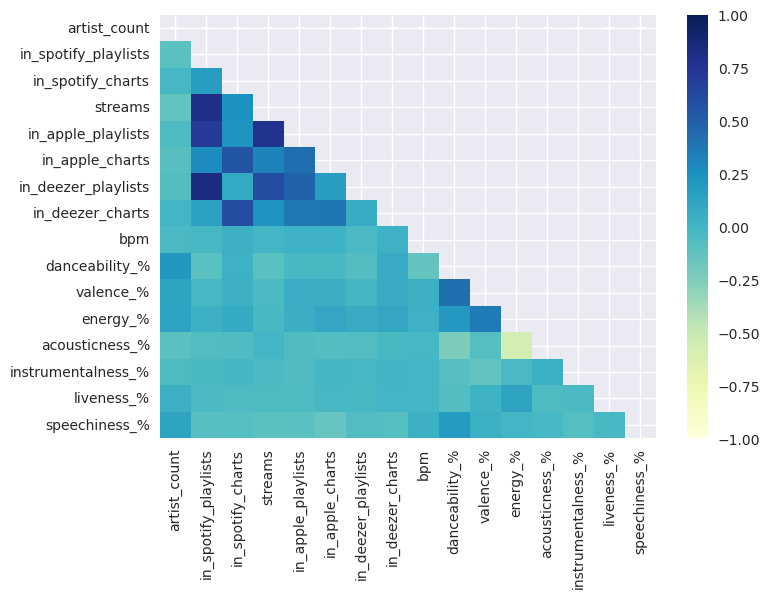

In [38]:
#Looking at correlation between variables

# creating mask to hide redundant information
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
  
# plotting correlation heatmap 
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True, fmt='.1g', mask=mask, vmin = -1, vmax = 1)

plt.show();


In [39]:
print(df.corr(numeric_only=True)["streams"].sort_values(ascending=False))


streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
bpm                    -0.002438
acousticness_%         -0.004485
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
Name: streams, dtype: float64


In [40]:
# dropping low correlated variables

df.drop(columns= ["bpm", "acousticness_%", "energy_%", "valence_%", "instrumentalness_%", "liveness_%"], axis=1, inplace=True)


In [41]:
df.head()


artist_count  in_spotify_playlists  in_spotify_charts    streams  \
0             2                   553                147  141381703   
1             1                  1474                 48  133716286   
2             1                  1397                113  140003974   
3             1                  7858                100  800840817   
4             1                  3133                 50  303236322   

   in_apple_playlists  in_apple_charts  in_deezer_playlists  in_deezer_charts  \
0                  43              263                   45                10   
1                  48              126                   58                14   
2                  94              207                   91                14   
3                 116              207                  125                12   
4                  84              133                   87                15   

    mode  danceability_%  speechiness_% released_season  
0  Major              80              4          Summer  
1  Major              71              4          Winter  
2  Major              51              6          Summer  
3  Major              55             15          Summer  
4  Minor              65              6          Spring

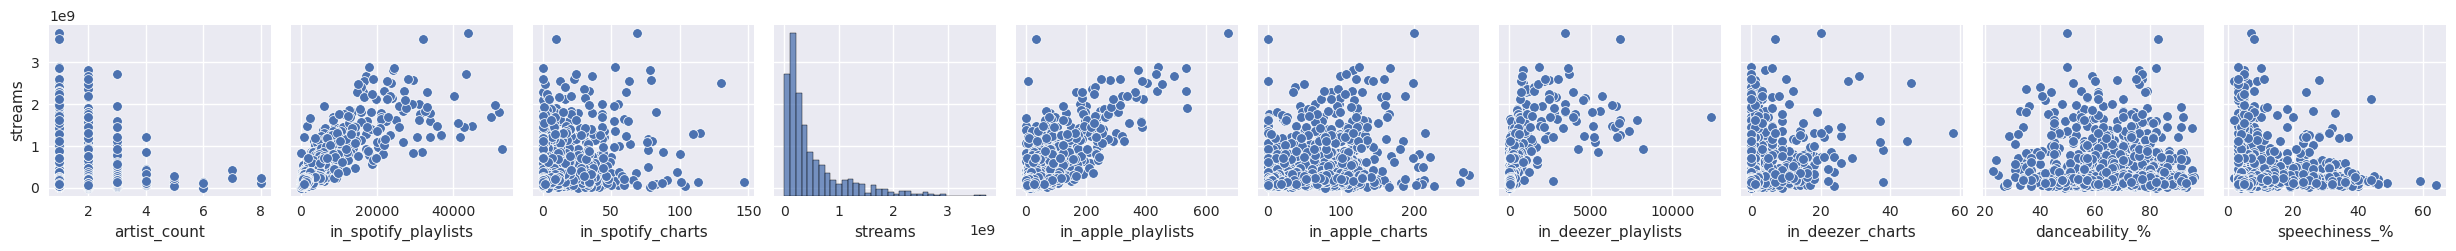

In [42]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();


For our Linear Regression Model, we are only going to use as features the ones that have a linear relationship with our target (streams), plus the categorical variables (released_season, mode)

# 5. Other considerations


In [43]:
#We drop the columns that we won´t use

df.drop(columns= ["artist_count", "in_spotify_charts", "in_apple_charts", "in_deezer_charts", "danceability_%",  "speechiness_%"], axis=1, inplace=True)


In [46]:
df.head()


in_spotify_playlists    streams  in_apple_playlists  in_deezer_playlists  \
0                   553  141381703                  43                   45   
1                  1474  133716286                  48                   58   
2                  1397  140003974                  94                   91   
3                  7858  800840817                 116                  125   
4                  3133  303236322                  84                   87   

    mode released_season  
0  Major          Summer  
1  Major          Winter  
2  Major          Summer  
3  Major          Summer  
4  Minor          Spring

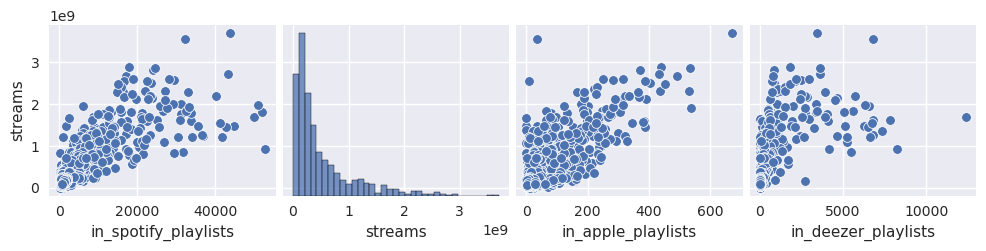

In [47]:
sns.pairplot(data = df, y_vars = 'streams')  
plt.show();


<Axes: xlabel='streams', ylabel='Count'>

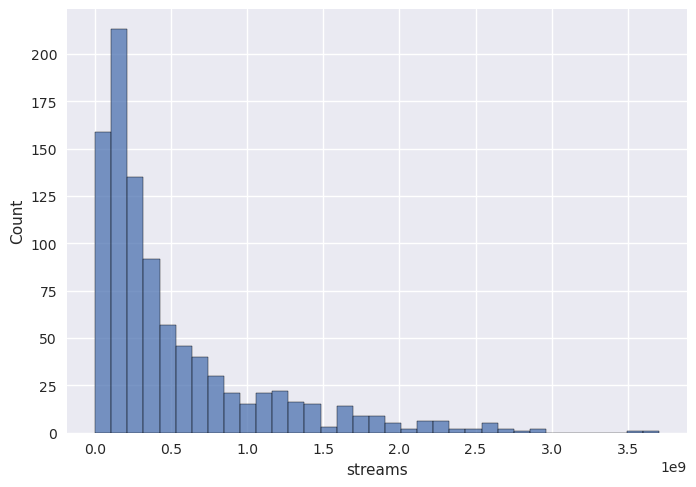

In [48]:
#handling outliers, as Linear regression is pretty sensitive to them

#Our target variable is positively (right) skweed
sns.histplot(df['streams'])


In [49]:
df.describe()


in_spotify_playlists       streams  in_apple_playlists  \
count            952.000000  9.520000e+02          952.000000   
mean            5202.565126  5.141374e+08           67.866597   
std             7901.400683  5.668569e+08           86.470591   
min               31.000000  2.762000e+03            0.000000   
25%              874.500000  1.416362e+08           13.000000   
50%             2216.500000  2.905309e+08           34.000000   
75%             5573.750000  6.738690e+08           88.000000   
max            52898.000000  3.703895e+09          672.000000   

       in_deezer_playlists  
count           952.000000  
mean            385.535714  
std            1131.078760  
min               0.000000  
25%              13.000000  
50%              44.000000  
75%             164.250000  
max           12367.000000

One common approach used for outlier detection is the Interquartile Range (IQR) which gives us an idea of how spread out the values in the middle of our data set are. 

This method works by sorting your dataset from the smallest to the largest values, then dividing in into four equal parts (called the quartiles). This leaves you with three points:
- **Q1 (first quartile)** - The 25th percentile. 25 percent of the data falls below this point.
- **Q2 (second quartile)** - The median. 50 percent of the data falls below and above this point.
- **Q2 (second quartile)** - The 75th percentile. 75 percent of the data falls below this point.

Using these points, you calculate the **Interquartile Range (IQR)** which is the range between the first and third quartiles

In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   in_spotify_playlists  952 non-null    int64 
 1   streams               952 non-null    int64 
 2   in_apple_playlists    952 non-null    int64 
 3   in_deezer_playlists   952 non-null    int64 
 4   mode                  952 non-null    object
 5   released_season       952 non-null    object
dtypes: int64(4), object(2)
memory usage: 44.8+ KB


In [51]:
# Find the 75th and 25th percentiles
stream_seventy_fifth = df["streams"].quantile(0.75)
stream_twenty_fifth = df["streams"].quantile(0.25)

# Calculate iqr
streams_iqr = stream_seventy_fifth - stream_twenty_fifth

# Calculate the thresholds
upper = stream_seventy_fifth + (1.5 * streams_iqr)
lower = stream_twenty_fifth - (1.5 * streams_iqr)

# Subset the data
df = df[(df["streams"] > lower) & (df["streams"] < upper)]


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 0 to 951
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   in_spotify_playlists  878 non-null    int64 
 1   streams               878 non-null    int64 
 2   in_apple_playlists    878 non-null    int64 
 3   in_deezer_playlists   878 non-null    int64 
 4   mode                  878 non-null    object
 5   released_season       878 non-null    object
dtypes: int64(4), object(2)
memory usage: 48.0+ KB


In [55]:
df.describe()


in_spotify_playlists       streams  in_apple_playlists  \
count            878.000000  8.780000e+02          878.000000   
mean            3709.158314  3.864873e+08           52.382688   
std             5325.048172  3.469503e+08           58.081386   
min               31.000000  2.762000e+03            0.000000   
25%              824.750000  1.344907e+08           12.000000   
50%             1940.500000  2.599158e+08           29.500000   
75%             4437.750000  5.366705e+08           73.000000   
max            52898.000000  1.457139e+09          387.000000   

       in_deezer_playlists  
count           878.000000  
mean            197.282460  
std             702.389481  
min               0.000000  
25%              12.000000  
50%              37.500000  
75%             114.000000  
max            8215.000000

In [54]:
#Scale Numerical Data with StandardScaler()

from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_z = df.copy()

scaler = StandardScaler()
num_cols = df_z.select_dtypes(include=np.number).columns

df_z[num_cols] = scaler.fit_transform(df[num_cols])

df_z.head()


in_spotify_playlists   streams  in_apple_playlists  in_deezer_playlists  \
0             -0.593038 -0.706860           -0.161636            -0.216930   
1             -0.419983 -0.728966           -0.075501            -0.198411   
2             -0.434452 -0.710833            0.716943            -0.151402   
3              0.779562  1.194954            1.095938            -0.102968   
4             -0.108259 -0.240087            0.544672            -0.157100   

    mode released_season  
0  Major          Summer  
1  Major          Winter  
2  Major          Summer  
3  Major          Summer  
4  Minor          Spring

In [56]:
df_z.tail()


in_spotify_playlists   streams  in_apple_playlists  in_deezer_playlists  \
947             -0.517879 -0.850791            0.148451            -0.228326   
948             -0.475226 -0.763124           -0.833490            -0.269637   
949             -0.589280 -0.902585           -0.867944            -0.271062   
950             -0.448920 -0.728449           -0.402814            -0.256817   
951             -0.550009 -0.837715           -0.437268            -0.235449   

      mode released_season  
947  Major          Summer  
948  Major          Summer  
949  Major          Summer  
950  Major          Summer  
951  Minor          Summer

In [57]:
df_dummy = pd.get_dummies(df_z)


In [58]:
df_dummy


in_spotify_playlists   streams  in_apple_playlists  in_deezer_playlists  \
0               -0.593038 -0.706860           -0.161636            -0.216930   
1               -0.419983 -0.728966           -0.075501            -0.198411   
2               -0.434452 -0.710833            0.716943            -0.151402   
3                0.779562  1.194954            1.095938            -0.102968   
4               -0.108259 -0.240087            0.544672            -0.157100   
..                    ...       ...                 ...                  ...   
947             -0.517879 -0.850791            0.148451            -0.228326   
948             -0.475226 -0.763124           -0.833490            -0.269637   
949             -0.589280 -0.902585           -0.867944            -0.271062   
950             -0.448920 -0.728449           -0.402814            -0.256817   
951             -0.550009 -0.837715           -0.437268            -0.235449   

     mode_Major  mode_Minor  released_season_Spring  released_season_Summer  \
0          True       False                   False                    True   
1          True       False                   False                   False   
2          True       False                   False                    True   
3          True       False                   False                    True   
4         False        True                    True                   False   
..          ...         ...                     ...                     ...   
947        True       False                   False                    True   
948        True       False                   False                    True   
949        True       False                   False                    True   
950        True       False                   False                    True   
951       False        True                   False                    True   

     released_season_Winter  
0                     False  
1                      True  
2                     False  
3                     False  
4                     False  
..                      ...  
947                   False  
948                   False  
949                   False  
950                   False  
951                   False  

[878 rows x 9 columns]

In [59]:
#Encoding categorical variables, done after standarization (so standarization was only applied on the "original" numerical columns)

from sklearn.preprocessing import OneHotEncoder

#One-hot-encoding

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_z.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_z[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_z, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)



In [60]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 870
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   in_spotify_playlists    878 non-null    float64
 1   streams                 878 non-null    float64
 2   in_apple_playlists      878 non-null    float64
 3   in_deezer_playlists     878 non-null    float64
 4   mode_Major              878 non-null    float64
 5   mode_Minor              878 non-null    float64
 6   released_season_Spring  878 non-null    float64
 7   released_season_Summer  878 non-null    float64
 8   released_season_Winter  878 non-null    float64
dtypes: float64(9)
memory usage: 74.3 KB


In [61]:
df_encoded.tail()


in_spotify_playlists  streams  in_apple_playlists  in_deezer_playlists  \
724                   NaN      NaN                 NaN                  NaN   
753                   NaN      NaN                 NaN                  NaN   
760                   NaN      NaN                 NaN                  NaN   
761                   NaN      NaN                 NaN                  NaN   
870                   NaN      NaN                 NaN                  NaN   

     mode_Major  mode_Minor  released_season_Spring  released_season_Summer  \
724         1.0         0.0                     1.0                     0.0   
753         1.0         0.0                     0.0                     1.0   
760         1.0         0.0                     0.0                     1.0   
761         0.0         1.0                     1.0                     0.0   
870         0.0         1.0                     0.0                     1.0   

     released_season_Winter  
724                     0.0  
753                     0.0  
760                     0.0  
761                     0.0  
870                     0.0

In [ ]:
# TODO drop mode_Minor as mode is either Major or Minor making thse 2 cols co-linear


# Linear Regression Machine Learning Model

##  Specifying Feature and Target variables for our model and spliting the sample into training and testing sets

In [62]:
# Select Features
X = df_dummy.drop('streams', axis=1)

# Select Target
y = df_dummy['streams']

# Set Training and Testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)


Shape of training feature: (702, 8)
Shape of testing feature: (176, 8)
Shape of training label: (702,)
Shape of testing label: (176,)


Fitting the model. **The best-fitting line** minimises the difference between the predicted values and the actual values in the data

In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

Interpret the model

In [64]:
#Interpreting the model
lm.intercept_


0.008652897108139641

In [65]:
# Get a table of your feature variable names and their associated coefficients (if multiple)
feature_df = pd.DataFrame(lm.coef_, index=X_train.columns)
feature_df.sort_values(by= 0, ascending= False)


0
in_spotify_playlists    0.664016
in_apple_playlists      0.300774
released_season_Spring  0.023317
released_season_Summer  0.004449
mode_Minor              0.000588
mode_Major             -0.000588
released_season_Winter -0.027766
in_deezer_playlists    -0.192816

In [203]:
#We can observe that "in_spotify_playlists" and "in_apple_playlists" explain most of the target variability. Songs that appear on Deezer playlists have a negative relationship with Spotify streams.
#and regarding the released season, songs released during Spring have a positive impact on our target, while Winter has a negative effect on it.


Model Evaluation

**R-squared** (a _coefficient of determination_) is a value between 0 and 1, and is a measure of goodness of fit, representing the proportion of the variance in the target explained by your feature variables. 

If the R-squared value is **_0_**, it means that **none of the variability** in the target variable is explained by the feature variables.

If the R-squared value is **_1_**, it means that **all of the variability** in the target variable is explained by the feature variables

In [66]:
# Checking the overall model perfomance on the entire dataset
lm.score(X, y)

#75% of the variation in the target variable can be explained by the feature variables


0.5702433151699616

In [205]:
#Evaluating Training and Testing sets R-square to check if our model could be over/underfitted


In [67]:
print(f'Training score: {lm.score(X_train, y_train):.2f}')
print(f'Testing score: {lm.score(X_test, y_test):.2f}')


Training score: 0.58
Testing score: 0.53


Evaluation of our model with different metrics:

We can use **Root Mean Squared Error (RMSE)** and/or **Mean Absolute Error (MAE)** in addition to R-squared.

RMSE gives the average magnitude of the errors in the model's prediction. The lower the RMSE, the better predictive accuracy. This metric can produce larger errors if you have outliers and so the larger errors might have a bigger impact on the overall performance of the model. This might be useful if you want to emphasise errors and want to improve the accuracy of the predictions. 

MAE gives the average absolute difference between the predicted and actual values. The lower the MAE, the better the predictive accuracy of your model. Robust to outliers and so might be a preferred metric if you have extreme values in your data set.

In [68]:
# Let's predict the target values of our testing set
test_predictions = lm.predict(X_test)


In [69]:
# Calculate the root mean squared error using the testing data and the predictions
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'RMSE: {rmse:.2f}')


RMSE: 0.68


In [70]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, test_predictions)

# Print the errors using f-strings and 3 decimal places
print(f'MAE: {mae:.2f}')


MAE: 0.48


Cross-validation

We will combine the k-Fold Cross Validation method in making our Linear Regression model, to improve the generalizability of our model, as well as to avoid overfitting in our predictions

In [71]:
from sklearn.model_selection import cross_val_score, KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores


array([0.54683832, 0.50122513, 0.54279952, 0.58255531, 0.67608709])

In [72]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores


array([-0.38036416, -0.41053895, -0.59728774, -0.44156831, -0.3634736 ])

Using RFE:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [73]:
len(X_train.columns)


8

In [74]:
# running RFE with number of features=5

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)


In [78]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns(),(rfe.support_ ,rfe.ranking_)))


TypeError: 'Index' object is not callable

In [79]:
# predict Spotify streams of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)


0.5265002811061802


In [80]:
# try with another value of RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, n_features_to_select=4)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.5263036814684703


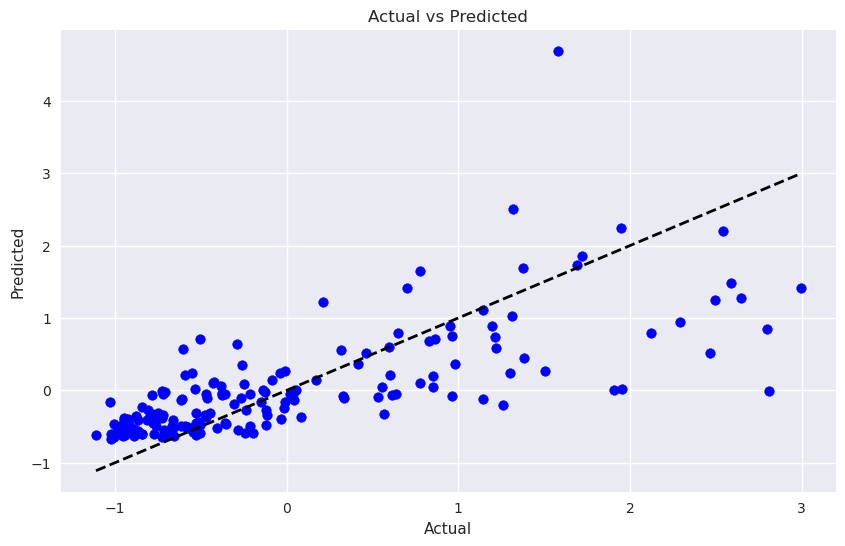

In [81]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Hyperparameter Tuning using Grid Search Cross-validation


In [82]:
# number of features in X_train
len(X_train.columns)


8

In [83]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 9))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8]}],
             return_train_score=True, scoring='r2', verbose=1)

In [84]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012851      0.001900         0.001931        0.000419   
1       0.008713      0.001158         0.001628        0.000383   
2       0.007386      0.000716         0.001335        0.000083   
3       0.021662      0.023135         0.001770        0.000273   
4       0.006489      0.001069         0.001524        0.000324   
5       0.005226      0.001204         0.001379        0.000099   
6       0.003481      0.000375         0.001381        0.000298   
7       0.002617      0.000375         0.001317        0.000163   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}           0.416169   
1                          2  {'n_features_to_select': 2}           0.529849   
2                          3  {'n_features_to_select': 3}           0.552925   
3                          4  {'n_features_to_select': 4}           0.547446   
4                          5  {'n_features_to_select': 5}           0.547634   
5                          6  {'n_features_to_select': 6}           0.547634   
6                          7  {'n_features_to_select': 7}           0.546838   
7                          8  {'n_features_to_select': 8}           0.546838   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.409953           0.488732           0.600025  ...   
1           0.501343           0.538415           0.562618  ...   
2           0.510079           0.547160           0.582694  ...   
3           0.503993           0.545118           0.582922  ...   
4           0.501425           0.542708           0.582853  ...   
5           0.501225           0.542708           0.582555  ...   
6           0.501225           0.542800           0.582555  ...   
7           0.501225           0.542800           0.582555  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.494291        0.075241                8            0.524141   
1         0.559113        0.055674                7            0.574883   
2         0.574163        0.056803                1            0.585783   
3         0.571295        0.058465                2            0.586351   
4         0.570316        0.059250                3            0.586700   
5         0.570042        0.058970                4            0.586700   
6         0.569901        0.059023                6            0.586731   
7         0.569901        0.059023                5            0.586731   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.529707            0.511299            0.481277   
1            0.584464            0.576678            0.567410   
2            0.596875            0.589097            0.576954   
3            0.598444            0.589361            0.577302   
4            0.598943            0.589462            0.577378   
5            0.598964            0.589462            0.577409   
6            0.598964            0.589466            0.577409   
7            0.598964            0.589466            0.577409   

   split4_train_score  mean_train_score  std_train_score  
0            0.493022          0.507889         0.018336  
1            0.548186          0.570324         0.012326  
2            0.559278          0.581597         0.012860  
3            0.559829          0.582258         0.013090  
4            0.559892          0.582475         0.013220  
5            0.559974          0.582502         0.013195  
6            0.559974          0.582509         0.013197  
7            0.559974          0.582509         0.013197  

[8 rows x 21 columns]

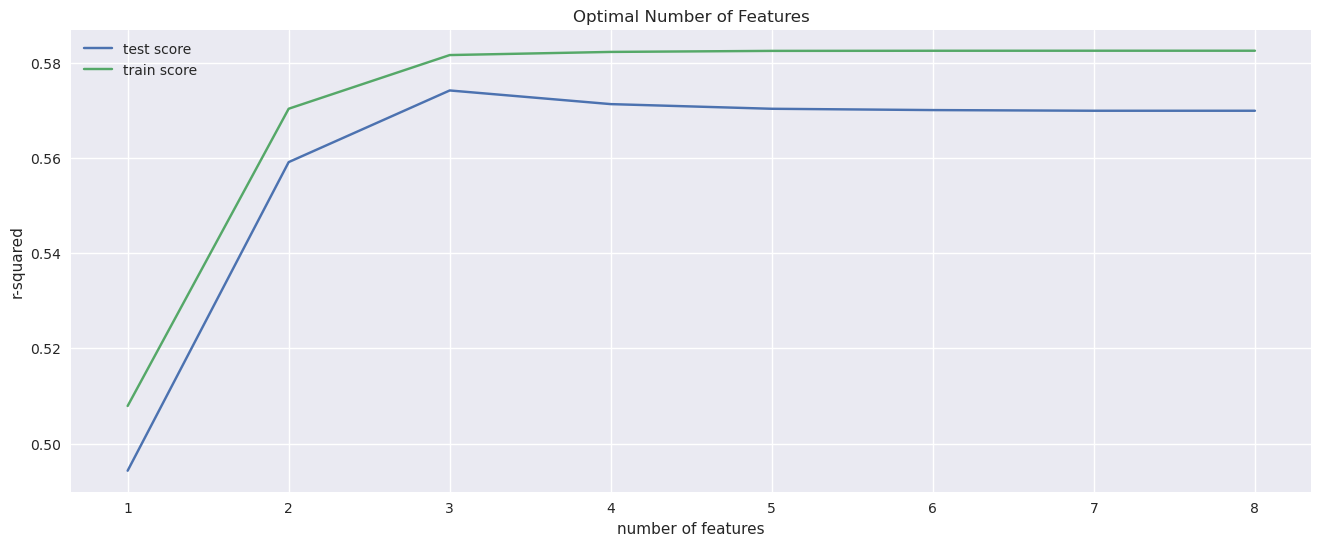

In [85]:
# plotting cv results to help us choose the optimal value of number of features and build a final model
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')


In [86]:
import sklearn

# final model
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)


0.526463264972088


In [ ]:
#In general, the mean score estimated by CV will usually be a good estimate of the test score.
